In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import shapefile as shp
import seaborn as sns

In [12]:
popu = pd.read_csv("USA STATEWISE POPULATION.csv")
cases = pd.read_csv("us-states.csv")
popu.head()
print (cases)

         date    state  fips  cases  deaths
0     3/13/20  Alabama     1      6       0
1     3/14/20  Alabama     1     12       0
2     3/15/20  Alabama     1     23       0
3     3/16/20  Alabama     1     29       0
4     3/17/20  Alabama     1     39       0
...       ...      ...   ...    ...     ...
3309  4/27/20  Wyoming    56    389       7
3310  4/28/20  Wyoming    56    396       7
3311  4/29/20  Wyoming    56    404       7
3312  4/30/20  Wyoming    56    415       7
3313   5/1/20  Wyoming    56    420       7

[3314 rows x 5 columns]


In [13]:
cases['date'] = pd.to_datetime(cases['date'])
#cases[cases.groupby('state').date.transform('max') == cases['date']]
casesnew = cases[cases.groupby('state').date.transform('max') == cases['date']]
casesnew.head()

,date,state,fips,cases,deaths
49,2020-05-01,Alabama,1,7294,289
100,2020-05-01,Alaska,2,362,7
197,2020-05-01,Arizona,4,7962,330
249,2020-05-01,Arkansas,5,3310,64
347,2020-05-01,California,6,52318,2147


In [14]:
mergeddf = popu.merge(casesnew, left_on='NAME', right_on='state')
mergeddf.head()

,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,date,state,fips,cases,deaths
0,Alabama,4903185,3814879,77.8,2020-05-01,Alabama,1,7294,289
1,Alaska,731545,551562,75.4,2020-05-01,Alaska,2,362,7
2,Arizona,7278717,5638481,77.5,2020-05-01,Arizona,4,7962,330
3,Arkansas,3017804,2317649,76.8,2020-05-01,Arkansas,5,3310,64
4,California,39512223,30617582,77.5,2020-05-01,California,6,52318,2147


In [15]:
mergeddf = mergeddf [['date','state','POPESTIMATE2019', 'cases', 'deaths']]
#mergeddf.sort_values('deaths',ascending=False)
mergeddf.head()


,date,state,POPESTIMATE2019,cases,deaths
0,2020-05-01,Alabama,4903185,7294,289
1,2020-05-01,Alaska,731545,362,7
2,2020-05-01,Arizona,7278717,7962,330
3,2020-05-01,Arkansas,3017804,3310,64
4,2020-05-01,California,39512223,52318,2147


In [16]:
mergeddf ['Cases Per Capita'] = mergeddf['POPESTIMATE2019']/mergeddf['cases']
mergeddf ['deaths Per Capita'] = mergeddf['POPESTIMATE2019']/mergeddf['deaths']
#mergeddf['Cases Per Capita']= Cases Per Capita
#mergeddf['deaths Per Capita']=deaths Per Capita
mergeddf.round({'Cases Per Capita': 2, 'deaths Per Capita':2} )
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita
0,2020-05-01,Alabama,4903185,7294,289,672.221689,16966.038062
1,2020-05-01,Alaska,731545,362,7,2020.842541,104506.428571
2,2020-05-01,Arizona,7278717,7962,330,914.181989,22056.718182
3,2020-05-01,Arkansas,3017804,3310,64,911.723263,47153.187500
4,2020-05-01,California,39512223,52318,2147,755.231909,18403.457382


In [20]:
mergeddf.sort_values(by=['Cases Per Capita', 'deaths Per Capita'],ascending=False)
mergeddf=mergeddf.round(2)
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita
0,2020-05-01,Alabama,4903185,7294,289,672.22,16966.04
1,2020-05-01,Alaska,731545,362,7,2020.84,104506.43
2,2020-05-01,Arizona,7278717,7962,330,914.18,22056.72
3,2020-05-01,Arkansas,3017804,3310,64,911.72,47153.19
4,2020-05-01,California,39512223,52318,2147,755.23,18403.46


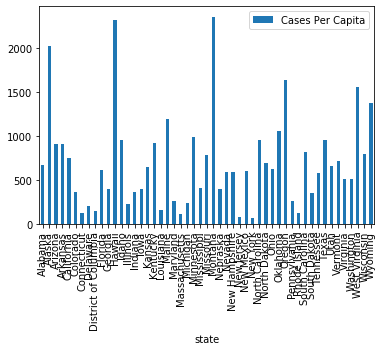

In [18]:
ax= mergeddf.plot(kind='bar',x='state',y='Cases Per Capita')
ax

In [22]:
mergeddf['death %'] = 100 - (100* ((mergeddf['cases'] - mergeddf['deaths'])/mergeddf['cases']) )
mergeddf=mergeddf.round(2)

#mergeddf['recovery'] = 100*(mergeddf['deaths']/mergeddf['cases'])
print (mergeddf)

         date                 state  POPESTIMATE2019   cases  deaths  \
0  2020-05-01               Alabama          4903185    7294     289   
1  2020-05-01                Alaska           731545     362       7   
2  2020-05-01               Arizona          7278717    7962     330   
3  2020-05-01              Arkansas          3017804    3310      64   
4  2020-05-01            California         39512223   52318    2147   
5  2020-05-01              Colorado          5758736   15661     818   
6  2020-05-01           Connecticut          3565287   28764    2339   
7  2020-05-01              Delaware           973764    4918     159   
8  2020-05-01  District of Columbia           705749    4658     231   
9  2020-05-01               Florida         21477737   34720    1313   
10 2020-05-01               Georgia         10617423   26436    1153   
11 2020-05-01                Hawaii          1415872     610      16   
12 2020-05-01                 Idaho          1787065    1883    

In [23]:
mergeddf.sort_values(by=['Cases Per Capita', 'deaths Per Capita'],ascending=False)

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %
26,2020-05-01,Montana,1068778,453,16,2359.33,66798.62,3.53
11,2020-05-01,Hawaii,1415872,610,16,2321.10,88492.00,2.62
1,2020-05-01,Alaska,731545,362,7,2020.84,104506.43,1.93
37,2020-05-01,Oregon,4217737,2579,104,1635.42,40555.16,4.03
48,2020-05-01,West Virginia,1792147,1151,47,1557.03,38130.79,4.08
50,2020-05-01,Wyoming,578759,420,7,1378.00,82679.86,1.67
19,2020-05-01,Maine,1344212,1123,55,1196.98,24440.22,4.90
36,2020-05-01,Oklahoma,3956971,3748,230,1055.76,17204.22,6.14
23,2020-05-01,Minnesota,5639632,5730,371,984.23,15201.16,6.47
33,2020-05-01,North Carolina,10488084,10922,405,960.27,25896.50,3.71


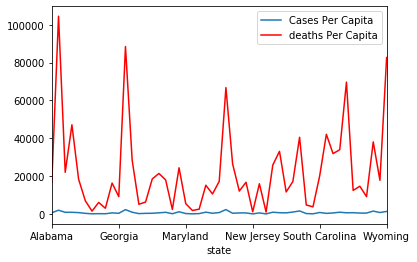

In [24]:
ax = plt.gca()

mergeddf.plot(kind='line',x='state',y='Cases Per Capita',ax=ax)
mergeddf.plot(kind='line',x='state',y='deaths Per Capita', color='red', ax=ax)

plt.show()

In [25]:
shapefile = 'cb_2018_us_state_500k.shp'
gdf = gp.read_file(shapefile)[['NAME', 'STUSPS','geometry']]

gdf.head()

,NAME,STUSPS,geometry
0,Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


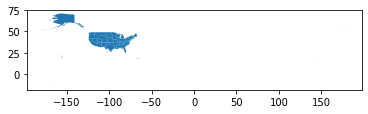

In [26]:
gdf.plot()

In [29]:
mergeddf = gdf.set_index('NAME').join(mergeddf.set_index('state'))
mergeddf.head()

,STUSPS,geometry,date,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %,NAME_x,STUSPS_x,geometry_x,NAME_y,STUSPS_y,geometry_y
NAME,,,,,,,,,,,,,,,
Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",2020-05-01,2976149.0,7212.0,281.0,412.67,10591.28,3.90,Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2020-05-01,10488084.0,10922.0,405.0,960.27,25896.50,3.71,North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",2020-05-01,3956971.0,3748.0,230.0,1055.76,17204.22,6.14,Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",2020-05-01,8535519.0,16901.0,581.0,505.03,14691.08,3.44,Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",2020-05-01,1792147.0,1151.0,47.0,1557.03,38130.79,4.08,West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
